# Gradient Strategy Analysis

Analysis of the Gradient strategy performance, specifically comparing the period before and after November 22, 2024.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_theme(style="darkgrid")

## Load Data

In [2]:
# Load backtest results
returns_path = '../data/gradient/backtests/returns_1d.csv'
df = pd.read_csv(returns_path, index_col=0, parse_dates=True)
df.columns = ['returns']
df.head()

,returns
datetime,
2020-08-19 00:00:00+00:00,0.0
2020-08-20 00:00:00+00:00,0.0
2020-08-21 00:00:00+00:00,0.0
2020-08-22 00:00:00+00:00,0.0
2020-08-23 00:00:00+00:00,0.0


## Cumulative Returns & Drawdown

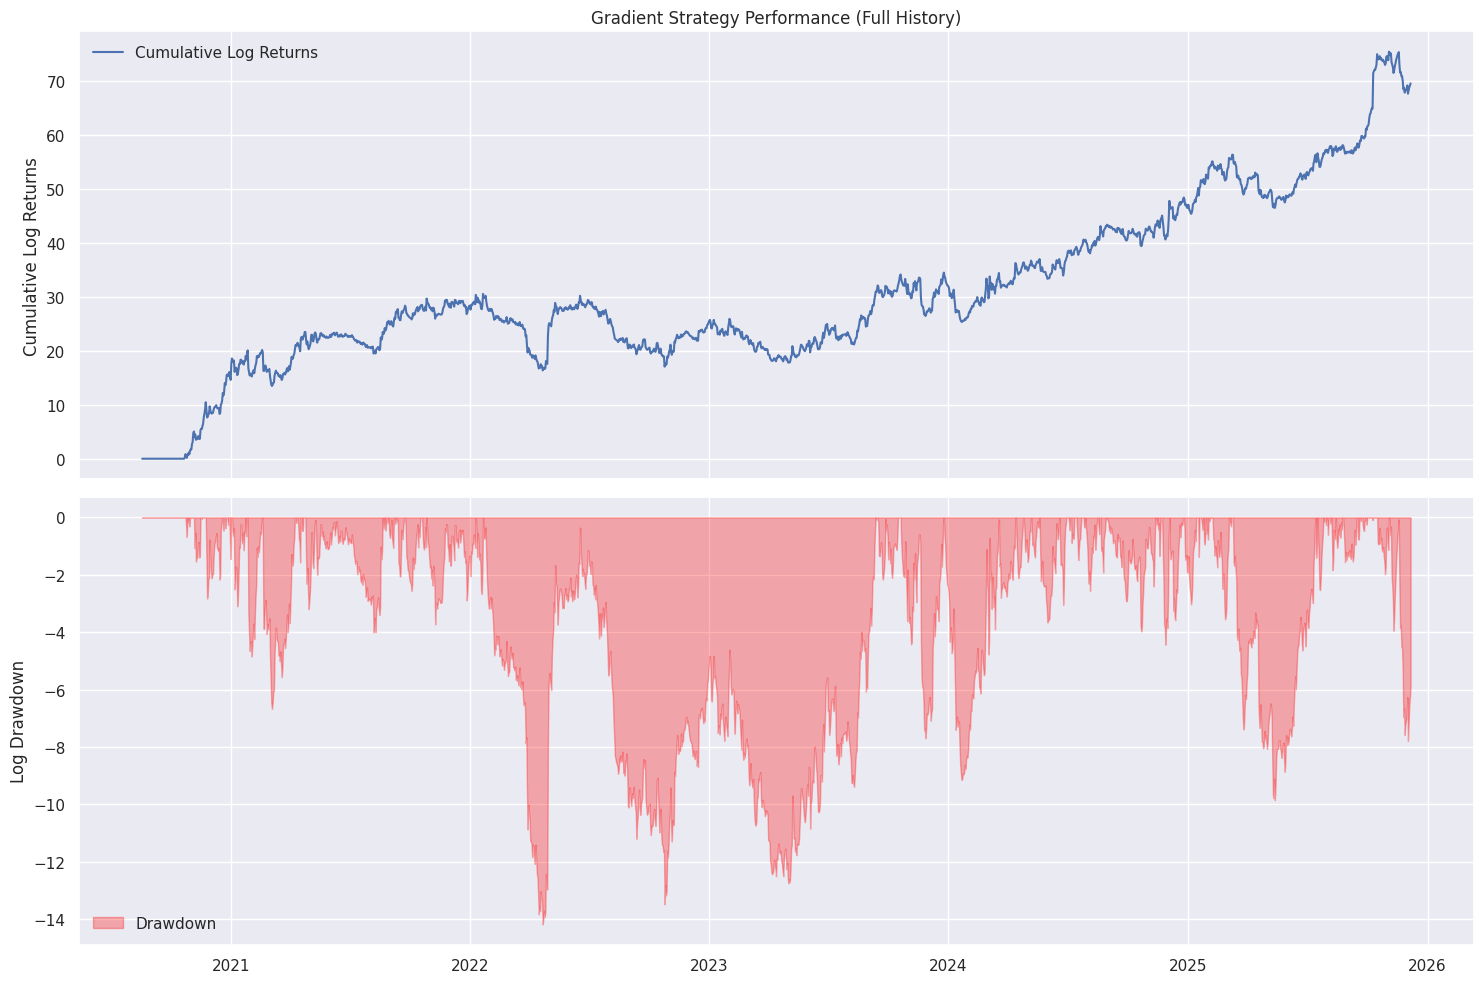

In [3]:
df['cum_returns'] = df['returns'].cumsum()
df['running_max'] = df['cum_returns'].cummax()
df['drawdown'] = df['cum_returns'] - df['running_max']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

ax1.plot(df.index, df['cum_returns'], label='Cumulative Log Returns')
ax1.set_title('Gradient Strategy Performance (Full History)')
ax1.set_ylabel('Cumulative Log Returns')
ax1.legend()

ax2.fill_between(df.index, df['drawdown'], 0, color='red', alpha=0.3, label='Drawdown')
ax2.set_ylabel('Log Drawdown')
ax2.legend()

plt.tight_layout()
plt.show()

## Pre vs Post Nov 22 Analysis

In [4]:
cutoff_date = '2024-11-22'

pre_df = df[df.index < cutoff_date]
post_df = df[df.index >= cutoff_date]

print(f"Data points pre-Nov 22: {len(pre_df)}")
print(f"Data points post-Nov 22: {len(post_df)}")

Data points pre-Nov 22: 1556
Data points post-Nov 22: 380


In [5]:
def calculate_stats(series, name="Strategy"):
    if len(series) < 2:
        return {"Name": name, "Total Return": np.nan}
        
    total_return = series.sum()
    daily_mean = series.mean()
    daily_std = series.std()
    sharpe = np.sqrt(365) * daily_mean / daily_std if daily_std > 0 else 0
    
    return {
        "Name": name,
        "Total Return": f"{total_return:.2%}",
        "Daily Mean": f"{daily_mean:.4%}",
        "Daily Vol": f"{daily_std:.4%}",
        "Ann. Sharpe": f"{sharpe:.2f}",
        "Count": len(series)
    }

stats_pre = calculate_stats(pre_df['returns'], "Pre-Nov 22")
stats_post = calculate_stats(post_df['returns'], "Post-Nov 22")
stats_all = calculate_stats(df['returns'], "Full History")

pd.DataFrame([stats_pre, stats_post, stats_all])

,Name,Total Return,Daily Mean,Daily Vol,Ann. Sharpe,Count
0,Pre-Nov 22,4458.06%,2.8651%,60.0452%,0.91,1556
1,Post-Nov 22,2497.84%,6.5733%,74.0839%,1.70,380
2,Full History,6955.90%,3.5929%,63.0440%,1.09,1936


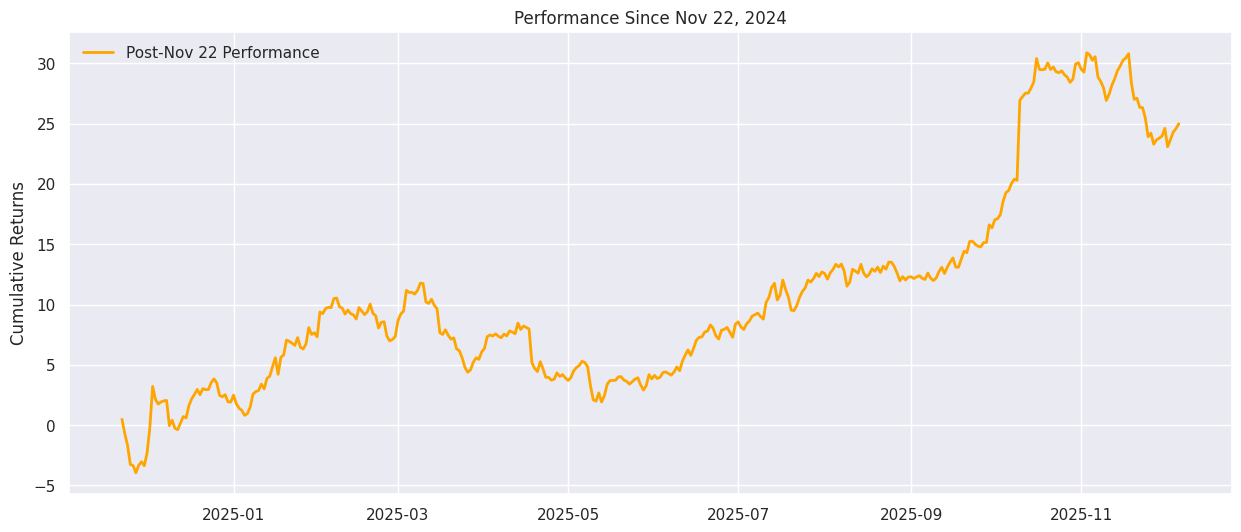

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))

# Re-base cumulative returns for comparison
if not post_df.empty:
    post_cum = post_df['returns'].cumsum()
    ax.plot(post_df.index, post_cum, label='Post-Nov 22 Performance', color='orange', linewidth=2)
    ax.set_title('Performance Since Nov 22, 2024')
    ax.set_ylabel('Cumulative Returns')
    ax.legend()
    plt.show()
else:
    print("No data available for post-Nov 22 period")